# Using PIL and numpy to transform Images


In [29]:
import numpy as np
from PIL import Image as image

## Using th PIL library to import the pictures

In [ ]:
img1 = image.open("house.png")
img2 = image.open("heart.png")
img1.show()
img2.show()

![alt text](heart.png)

![alt text](house.png)

# Using numpy to view the images as an array of numbers

In [31]:
arr1 = np.array(img1)
arr2 = np.array(img2)

arr1

array([[[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [32]:
arr2.shape

(394, 410, 3)

# Adding the arrays together

In [ ]:
arr2.resize(arr1.shape)
arr3 = arr1+arr2
arr3

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

# Viewing the results

In [34]:
image3 = image.fromarray(arr3.astype('uint64'), mode='RGB')
image3.show()

/tmp/ipykernel_258505/1512661591.py:1: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image3 = image.fromarray(arr3.astype('uint64'), mode='RGB')


![alt text](<Screenshot 2025-07-14 162708.png>)

# Corrected code

## Mistakes-

- not converting to unit8
- not converting to RGB
- not capping at 255 to avoid overflow

In [ ]:
from PIL import Image
import numpy as np

# Load two images (they must be the same size)
img1 = Image.open("heart.png").convert('RGB')
img2 = Image.open("house.png").convert('RGB')

# Resize to match (optional but usually required)
img2 = img2.resize(img1.size)

# Convert to NumPy arrays
arr1 = np.array(img1, dtype=np.uint8)
arr2 = np.array(img2, dtype=np.uint8)

# Add the images (element-wise addition, capped at 255 to avoid overflow)
added_array = np.clip(arr1 + arr2, 0, 255).astype(np.uint8)

# Convert back to image
result_image = Image.fromarray(added_array, 'RGB')
result_image.show()


/tmp/ipykernel_258505/455401744.py:19: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  result_image = Image.fromarray(added_array, 'RGB')


![alt text](<Screenshot 2025-07-14 162900.png>)

Other option USING blend form the image library


In [36]:
blended = Image.blend(img1, img2, alpha=0.5)  # alpha controls mix ratio
blended.show()


![alt text](<Screenshot 2025-07-14 163545.png>)

# Matrix Subtraction operation

In [38]:
from PIL import Image
import numpy as np

# Load two images (they must be the same size)
img1 = Image.open("heart.png").convert('RGB')
img2 = Image.open("house.png").convert('RGB')

# Resize
img2 = img2.resize(img1.size)

# Using numpy to make the arrays
arr1 = np.array(img1,dtype=np.uint8)
arr2 = np.array(img2,dtype=np.uint8)

added_array = np.clip(arr1 - arr2, 0, 255).astype(np.uint8)

# Convert back to image
result_image = Image.fromarray(added_array, 'RGB')
result_image.show()

/tmp/ipykernel_258505/279056875.py:18: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  result_image = Image.fromarray(added_array, 'RGB')


![alt text](<Screenshot 2025-07-14 164624.png>)

In [54]:
#all the imports required
import matplotlib.pyplot as plt

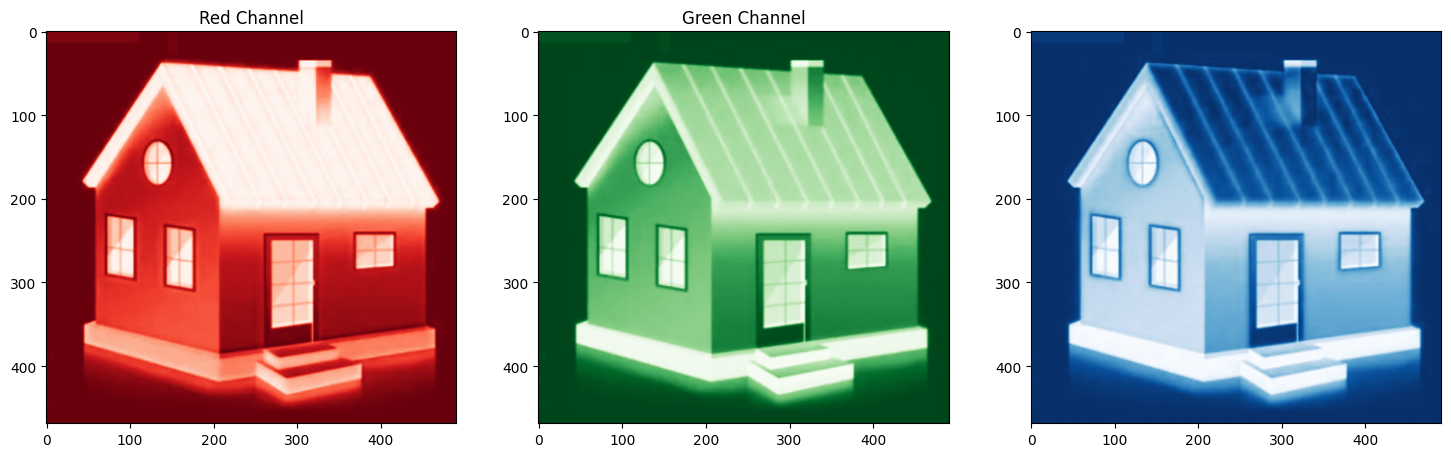

In [55]:
# Split the image into separate channels
image = Image.open('Home.jpg')
red_channel, green_channel, blue_channel = image.split()

figure, (red, green, blue) = plt.subplots(ncols=3, figsize=(18, 8)) # figsize is (width, height) in inches

red.imshow(red_channel, cmap='Reds')
red.set_title("Red Channel")

green.imshow(green_channel, cmap='Greens')
green.set_title("Green Channel")

blue.imshow(blue_channel, cmap='Blues')

<PIL.Image.Image image mode=L size=491x469 at 0x76C9ADABA230>


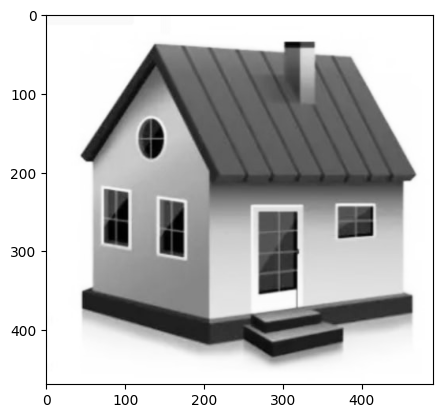

In [53]:
# Convert image to grey scale 
image = Image.open('Home.jpg')
image_grayscale = image.convert(mode='L')
print(image_grayscale)

plt.imshow(image_grayscale,cmap='Greys_r')